<a href="https://colab.research.google.com/github/anirudhjain1999/Portfolio-Simulator/blob/main/PortfolioSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
!pip install yfinance
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.colors as colors
import pickle
from prophet import Prophet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
etf_list = [
'MGK',
'PFIX',
'IHF',
'IVV',
'IYZ',
'XME',
'XLY',
'PXE',
'IAU',
'UNL',
'DIG',
'GRID',
'^GSPC'
]
end = datetime.now()
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 
etfdata = yf.download(etf_list,start,end)['Adj Close']

[*********************100%***********************]  13 of 13 completed


In [ ]:
#etfdata=pd.read_csv('new3.csv')
etfdata

,DIG,GRID,IAU,IHF,IVV,IYZ,MGK,PFIX,PXE,UNL,XLY,XME,^GSPC
Date,,,,,,,,,,,,,
2022-01-05,21.175005,99.778770,34.410000,279.946136,462.917358,31.832275,250.010941,38.398624,19.952290,12.080000,201.633545,45.471680,4700.580078
2022-01-06,22.127991,99.680092,34.000000,269.733948,462.572906,31.832275,249.166397,38.279427,20.659679,12.100000,201.108124,44.803120,4696.049805
2022-01-07,22.736227,98.663757,34.150002,267.363617,460.722534,31.802944,246.682373,38.368816,20.785652,12.090000,197.757294,45.294712,4677.029785
2022-01-10,22.588478,97.548744,34.250000,270.375916,459.856384,31.822500,246.344528,38.785980,20.669369,12.550000,196.547836,44.921101,4670.290039
2022-01-11,24.053665,98.308525,34.680000,274.435089,464.393768,32.106018,249.186249,38.954830,21.599636,12.760000,198.441360,45.707642,4713.069824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,41.080002,86.300003,34.220001,265.399994,378.459991,21.910000,168.210007,72.870003,28.920000,17.620001,126.260002,49.150002,3783.219971
2022-12-29,41.950001,87.910004,34.439999,267.839996,385.010010,22.410000,172.470001,71.040001,29.430000,17.450001,129.509995,50.070000,3849.280029
2022-12-30,42.500000,87.239998,34.590000,267.690002,384.209991,22.430000,172.070007,71.610001,29.580000,17.230000,129.160004,49.810001,3839.500000


In [ ]:
print(etfdata.shape)
print(etfdata.info())

(251, 13)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-05 to 2023-01-04
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIG     251 non-null    float64
 1   GRID    251 non-null    float64
 2   IAU     251 non-null    float64
 3   IHF     251 non-null    float64
 4   IVV     251 non-null    float64
 5   IYZ     251 non-null    float64
 6   MGK     251 non-null    float64
 7   PFIX    251 non-null    float64
 8   PXE     251 non-null    float64
 9   UNL     251 non-null    float64
 10  XLY     251 non-null    float64
 11  XME     251 non-null    float64
 12  ^GSPC   251 non-null    float64
dtypes: float64(13)
memory usage: 27.5 KB
None


In [ ]:
etfdata.isnull().sum()

DIG      0
GRID     0
IAU      0
IHF      0
IVV      0
IYZ      0
MGK      0
PFIX     0
PXE      0
UNL      0
XLY      0
XME      0
^GSPC    0
dtype: int64

In [ ]:
etfdata = etfdata.reset_index()

In [ ]:
etfdata[etfdata.duplicated()]

,Date,DIG,GRID,IAU,IHF,IVV,IYZ,MGK,PFIX,PXE,UNL,XLY,XME,^GSPC


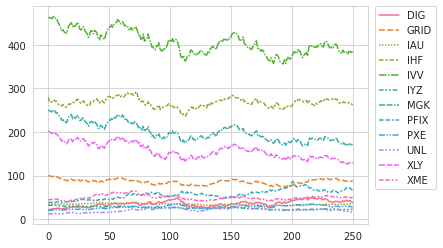

In [ ]:
ax=sns.lineplot(data=etfdata.drop('^GSPC',axis=1))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
daily_return = etfdata.set_index('Date').pct_change(1)
daily_return

,DIG,GRID,IAU,IHF,IVV,IYZ,MGK,PFIX,PXE,UNL,XLY,XME,^GSPC
Date,,,,,,,,,,,,,
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,0.045005,-0.000989,-0.011915,-0.036479,-0.000744,0.000000,-0.003378,-0.003104,0.035454,0.001656,-0.002606,-0.014703,-0.000964
2022-01-07,0.027487,-0.010196,0.004412,-0.008788,-0.004000,-0.000921,-0.009969,0.002335,0.006098,-0.000826,-0.016662,0.010972,-0.004050
2022-01-10,-0.006498,-0.011301,0.002928,0.011267,-0.001880,0.000615,-0.001370,0.010872,-0.005594,0.038048,-0.006116,-0.008248,-0.001441
2022-01-11,0.064864,0.007789,0.012555,0.015013,0.009867,0.008909,0.011536,0.004353,0.045007,0.016733,0.009634,0.017509,0.009160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,-0.049954,-0.014390,-0.004654,-0.005955,-0.012137,-0.014838,-0.012852,0.010259,-0.041750,-0.042911,-0.008403,-0.040039,-0.012021
2022-12-29,0.021178,0.018656,0.006429,0.009194,0.017307,0.022821,0.025325,-0.025113,0.017635,-0.009648,0.025740,0.018718,0.017461
2022-12-30,0.013111,-0.007621,0.004355,-0.000560,-0.002078,0.000892,-0.002319,0.008024,0.005097,-0.012608,-0.002702,-0.005193,-0.002541


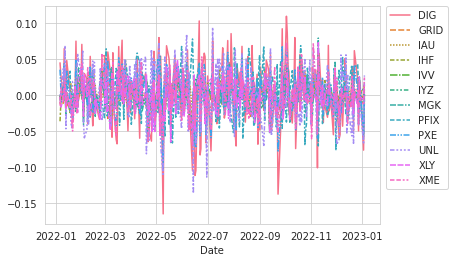

In [ ]:
ax2=sns.lineplot(data=daily_return.drop('^GSPC',axis=1))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
# calculating expected returns
daily_return.describe()

,DIG,GRID,IAU,IHF,IVV,IYZ,MGK,PFIX,PXE,UNL,XLY,XME,^GSPC
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.003463,-0.000315,0.000138,-0.000172,-0.000616,-0.001186,-0.001291,0.002699,0.001758,0.001934,-0.001515,0.000750,-0.000680
std,0.044224,0.017512,0.009658,0.013698,0.015253,0.015395,0.020526,0.030592,0.027990,0.036979,0.021517,0.026257,0.015216
min,-0.165625,-0.041172,-0.029246,-0.047874,-0.043638,-0.044311,-0.053677,-0.077242,-0.101501,-0.136799,-0.065384,-0.070287,-0.043237
25%,-0.021436,-0.011958,-0.006343,-0.008880,-0.009825,-0.011803,-0.013621,-0.018305,-0.016419,-0.018615,-0.015922,-0.015767,-0.009710
50%,0.004050,-0.000980,0.000310,0.000073,-0.001901,-0.000356,-0.002516,0.003884,0.003103,0.003739,-0.002356,0.001804,-0.001609
75%,0.032197,0.009930,0.005574,0.009377,0.009734,0.008336,0.013632,0.024009,0.020790,0.027373,0.013149,0.018484,0.009505
max,0.109948,0.061071,0.030685,0.036637,0.054768,0.048215,0.079550,0.078265,0.067337,0.094413,0.073084,0.072435,0.055434


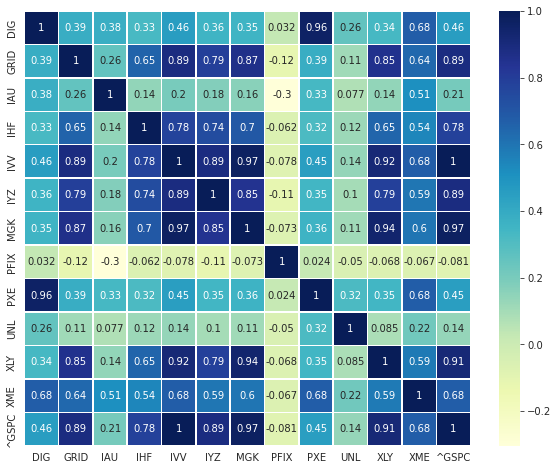

In [ ]:
#using heat map for estimataing beta
plt.figure(figsize=(10,8))
sns.heatmap(daily_return.corr(method='pearson'),annot=True,linewidths=0.5,cmap='YlGnBu')

In [ ]:
daily_return

,DIG,GRID,IAU,IHF,IVV,IYZ,MGK,PFIX,PXE,UNL,XLY,XME,^GSPC
Date,,,,,,,,,,,,,
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,0.045005,-0.000989,-0.011915,-0.036479,-0.000744,0.000000,-0.003378,-0.003104,0.035454,0.001656,-0.002606,-0.014703,-0.000964
2022-01-07,0.027487,-0.010196,0.004412,-0.008788,-0.004000,-0.000921,-0.009969,0.002335,0.006098,-0.000826,-0.016662,0.010972,-0.004050
2022-01-10,-0.006498,-0.011301,0.002928,0.011267,-0.001880,0.000615,-0.001370,0.010872,-0.005594,0.038048,-0.006116,-0.008248,-0.001441
2022-01-11,0.064864,0.007789,0.012555,0.015013,0.009867,0.008909,0.011536,0.004353,0.045007,0.016733,0.009634,0.017509,0.009160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,-0.049954,-0.014390,-0.004654,-0.005955,-0.012137,-0.014838,-0.012852,0.010259,-0.041750,-0.042911,-0.008403,-0.040039,-0.012021
2022-12-29,0.021178,0.018656,0.006429,0.009194,0.017307,0.022821,0.025325,-0.025113,0.017635,-0.009648,0.025740,0.018718,0.017461
2022-12-30,0.013111,-0.007621,0.004355,-0.000560,-0.002078,0.000892,-0.002319,0.008024,0.005097,-0.012608,-0.002702,-0.005193,-0.002541


In [ ]:
etfdata

,Date,DIG,GRID,IAU,IHF,IVV,IYZ,MGK,PFIX,PXE,UNL,XLY,XME,^GSPC
0,2022-01-05,21.175005,99.778770,34.410000,279.946136,462.917358,31.832275,250.010941,38.398624,19.952290,12.080000,201.633545,45.471680,4700.580078
1,2022-01-06,22.127991,99.680092,34.000000,269.733948,462.572906,31.832275,249.166397,38.279427,20.659679,12.100000,201.108124,44.803120,4696.049805
2,2022-01-07,22.736227,98.663757,34.150002,267.363617,460.722534,31.802944,246.682373,38.368816,20.785652,12.090000,197.757294,45.294712,4677.029785
3,2022-01-10,22.588478,97.548744,34.250000,270.375916,459.856384,31.822500,246.344528,38.785980,20.669369,12.550000,196.547836,44.921101,4670.290039
4,2022-01-11,24.053665,98.308525,34.680000,274.435089,464.393768,32.106018,249.186249,38.954830,21.599636,12.760000,198.441360,45.707642,4713.069824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-28,41.080002,86.300003,34.220001,265.399994,378.459991,21.910000,168.210007,72.870003,28.920000,17.620001,126.260002,49.150002,3783.219971
247,2022-12-29,41.950001,87.910004,34.439999,267.839996,385.010010,22.410000,172.470001,71.040001,29.430000,17.450001,129.509995,50.070000,3849.280029
248,2022-12-30,42.500000,87.239998,34.590000,267.690002,384.209991,22.430000,172.070007,71.610001,29.580000,17.230000,129.160004,49.810001,3839.500000
249,2023-01-03,39.240002,87.190002,34.880001,264.109985,382.529999,22.639999,170.949997,67.489998,28.049999,16.049999,128.389999,49.119999,3824.139893


In [ ]:
df=pd.melt(etfdata,id_vars='Date',value_vars=[
'MGK',
'PFIX',
'IHF',
'IVV',
'IYZ',
'XME',
'XLY',
'PXE',
'IAU',
'UNL',
'DIG',
'GRID'
])
df.columns=['ds', 'ticker','y']

In [ ]:
groups_by_ticker = df.groupby('ticker')
# Check the groups in the dataframe
groups_by_ticker.groups.keys()
ticker_list = [
'MGK',
'PFIX',
'IHF',
'IVV',
'IYZ',
'XME',
'XLY',
'PXE',
'IAU',
'UNL',
'DIG',
'GRID']

In [ ]:
def train_and_forecast(group):
  # Initiate the model
  m = Prophet()
  # Fit the model
  m.fit(group)
  # Make predictions
  future = m.make_future_dataframe(periods=365)
  forecast = m.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  forecast['ticker'] = group['ticker'].iloc[0]
  # Return the forecasted results
  return forecast[['ds', 'ticker', 'yhat', 'yhat_upper', 'yhat_lower']]

In [ ]:

# Create an empty dataframe
final = pd.DataFrame()
# Loop through each ticker
for ticker in ticker_list:
  # Get the data for the ticker
  group = groups_by_ticker.get_group(ticker)  
  # Make forecast
  forecast = train_and_forecast(group)
  # Add the forecast results to the dataframe
  final = pd.concat((final, forecast))
print('The time used for the for-loop forecast is ')
# Take a look at the data
final.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpan2p_3ew/pmgbvk39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpan2p_3ew/mkp3pq01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40355', 'data', 'file=/tmp/tmpan2p_3ew/pmgbvk39.json', 'init=/tmp/tmpan2p_3ew/mkp3pq01.json', 'output', 'file=/tmp/tmpan2p_3ew/prophet_model0bgogg3a/prophet_model-20230105071152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

The time used for the for-loop forecast is 


,ds,ticker,yhat,yhat_upper,yhat_lower
0,2022-01-05,MGK,241.126067,251.546088,230.417191
1,2022-01-06,MGK,240.341570,251.133847,230.025223
2,2022-01-07,MGK,239.736396,250.745178,228.771195
3,2022-01-10,MGK,239.614549,250.694717,229.702242
4,2022-01-11,MGK,238.868601,248.889952,228.420245


In [ ]:
final.drop(['yhat_upper','yhat_lower'],axis = 1,inplace = True)
df_unmelted = final.pivot(index='ds', columns='ticker')

In [ ]:
df_unmelted = df_unmelted['yhat'].reset_index()
df_unmelted.columns.name = None


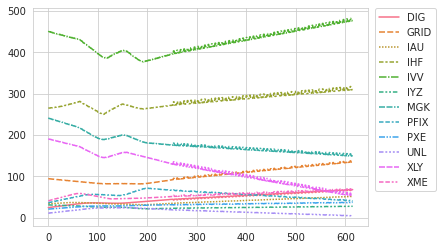

In [ ]:
ax=sns.lineplot(data=df_unmelted)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
forecasted_returns = df_unmelted.set_index('ds').pct_change(1)

In [ ]:
mean_forecasted_daily_return = forecasted_returns.mean()

In [ ]:
cov=daily_return.cov()
var=daily_return['^GSPC'].var()
betalist={}
for i in daily_return.drop('^GSPC',axis=1).columns: 
    betalist[i]=(cov.loc[i,'^GSPC']/var).round(2)
betalist.items() 


dict_items([('DIG', 1.33), ('GRID', 1.03), ('IAU', 0.13), ('IHF', 0.7), ('IVV', 1.0), ('IYZ', 0.9), ('MGK', 1.31), ('PFIX', -0.16), ('PXE', 0.83), ('UNL', 0.34), ('XLY', 1.29), ('XME', 1.17)])

In [ ]:
expreturn={}
for i,j in mean_forecasted_daily_return.items():
    expreturn[i] = (j+1)**252 - 1 

In [ ]:
expreturn.items()

dict_items([('DIG', 0.5670358173901431), ('GRID', 0.1770620187637162), ('IAU', 0.1886763212319429), ('IHF', 0.08296097137852021), ('IVV', 0.028153755576451944), ('IYZ', -0.04195051673584893), ('MGK', -0.16065036011110723), ('PFIX', 0.06514437307354215), ('PXE', 0.27599223239358994), ('UNL', -0.23872042761866719), ('XLY', -0.338882269551702), ('XME', 0.2728405397259319)])

In [ ]:
def portfolio_annualized_performance(weights, expreturn, cov_matrix):
    # Given the avg returns, weights of equities calc. the portfolio return
    returns = np.sum(expreturn*weights)
    # Standard deviation of portfolio (using dot product against covariance, weights)
    # 252 trading days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return std, returns

In [ ]:
def generate_random_portfolios(num_portfolios, expreturn, cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our ETFs
        weights = np.random.random(12)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, expreturn, cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array

In [ ]:
returns = etfdata.drop('^GSPC',axis=1).set_index('Date').pct_change()
expreturn = pd.Series(expreturn)
cov_matrix = returns.cov()
# Number of portfolios to simulate
num_portfolios = 10000
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates
risk_free_rate = 0.0368

<ipython-input-36-2e7043c82493>:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.Allocation]


Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.21
Annualized Volatility: 0.02
Allocation at max Sharpe ratio
                 DIG      GRID       IAU       IHF       IVV       IYZ  \
Allocation  0.141139  0.024037  0.138323  0.149038  0.050006  0.027535   

                 MGK      PFIX       PXE      UNL       XLY       XME  
Allocation  0.010884  0.101863  0.161873  0.01473  0.012825  0.167747   



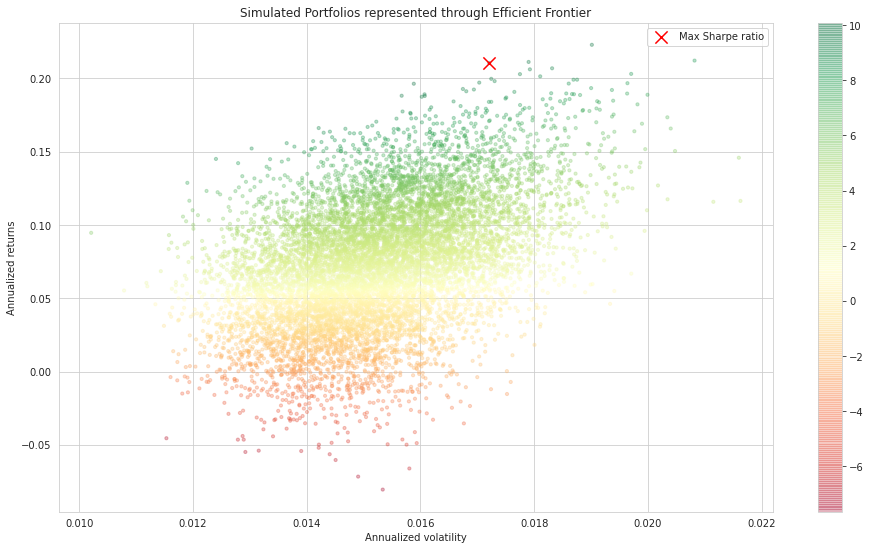

In [ ]:
def display_simulated_portfolios(expreturn, cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
    results, weights = generate_random_portfolios(num_portfolios,expreturn, cov_matrix, risk_free_rate)

    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=etfdata.drop('^GSPC',axis=1).set_index('Date').columns,columns=['Allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.Allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    print("Portfolio at maximum Sharpe Ratio\n")
    print("="*100)
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))
    print("="*100)
    print("Allocation at max Sharpe ratio")
    print(max_sharpe_allocation,"\n")
    print("="*100)

    plt.figure(figsize=(16, 9))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='RdYlGn', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated Portfolios represented through Efficient Frontier')
    plt.xlabel('Annualized volatility')
    plt.ylabel('Annualized returns')
    plt.legend(labelspacing=1.2)
display_simulated_portfolios(expreturn, cov_matrix, num_portfolios, risk_free_rate)


In [ ]:
# pickle_out = open("df_unmelted.pkl", "wb")
# pickle.dump(df_unmelted.round(2), pickle_out)
# pickle_out.close()